In [4]:
import pandas as pd

# Load the dataset
file_path = 'single_family_home_values.csv'
data = pd.read_csv(file_path)

data_head = data.head()
data_shape = data.shape
data_types = data.dtypes
missing_values = data.isnull().sum()
summary_statistics = data.describe()

data_head, data_shape, data_types, missing_values, summary_statistics


(          id              address    city state  zipcode   latitude  \
 0   39525749      8171 E 84th Ave  Denver    CO    80022  39.849160   
 1  184578398    10556 Wheeling St  Denver    CO    80022  39.888020   
 2  184430015  3190 Wadsworth Blvd  Denver    CO    80033  39.761710   
 3  155129946  3040 Wadsworth Blvd  Denver    CO    80033  39.760780   
 4     245107      5615 S Eaton St  Denver    CO    80123  39.616181   
 
     longitude  bedrooms  bathrooms  rooms  squareFootage  lotSize  yearBuilt  \
 0 -104.893468         3        2.0      6           1378     9968     2003.0   
 1 -104.830930         2        2.0      6           1653     6970     2004.0   
 2 -105.081070         3        1.0      0           1882    23875     1917.0   
 3 -105.081060         4        3.0      0           2400    11500     1956.0   
 4 -105.058812         3        4.0      8           2305     5600     1998.0   
 
   lastSaleDate  lastSaleAmount priorSaleDate  priorSaleAmount  estimated_valu

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

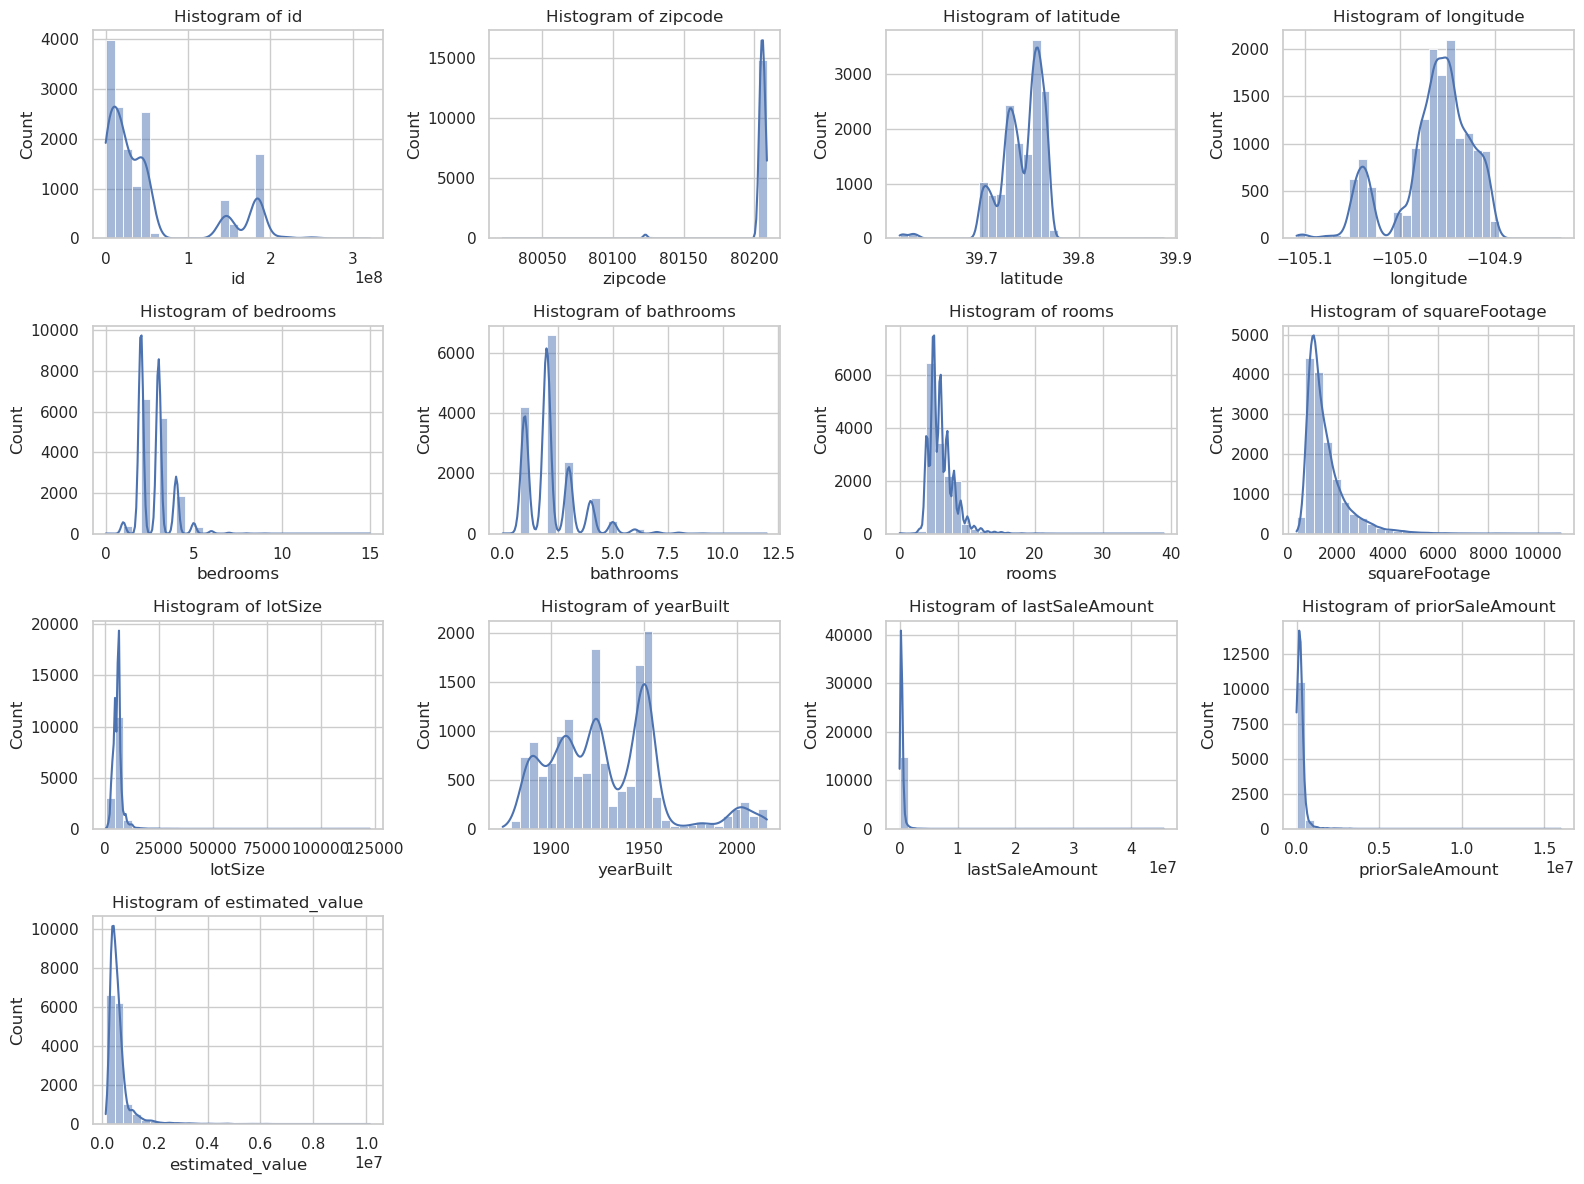

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


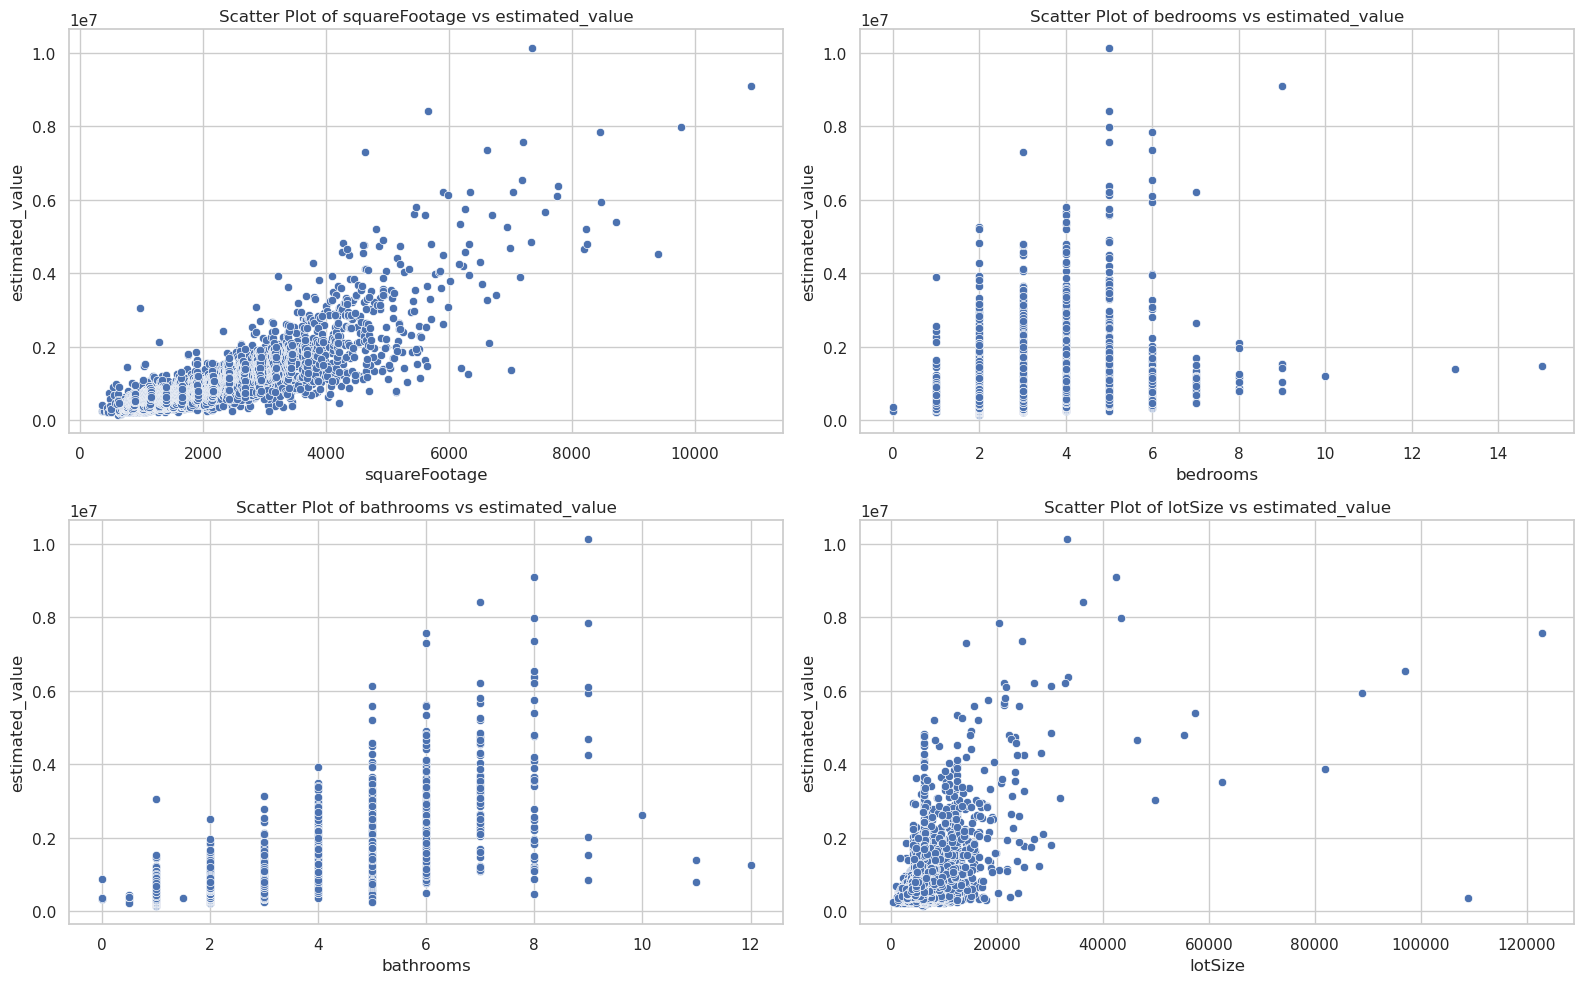

In [8]:

target_variable = 'estimated_value'

plt.figure(figsize=(16, 10))


features_to_plot = ['squareFootage', 'bedrooms', 'bathrooms', 'lotSize']

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=data, x=feature, y=target_variable)
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()


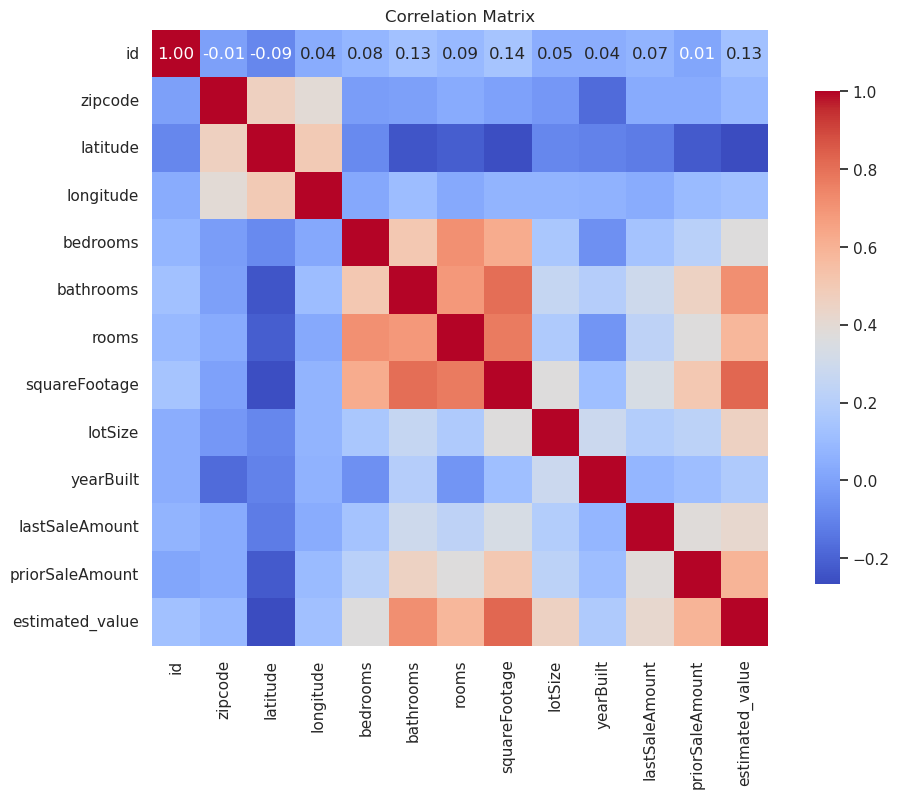

In [10]:
# Generate correlation matrix
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split


X = data[numerical_columns].drop(columns=[target_variable])  
y = data[target_variable]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((12000, 12), (3000, 12), (12000,), (3000,))

In [20]:

data_cleaned = data.dropna()


X_cleaned = data_cleaned[numerical_columns].drop(columns=[target_variable])
y_cleaned = data_cleaned[target_variable]


X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

# Initialize the Linear Regression model
linear_model_cleaned = LinearRegression()


linear_model_cleaned.fit(X_train_cleaned, y_train_cleaned)


y_pred_linear_cleaned = linear_model_cleaned.predict(X_test_cleaned)


mse_linear_cleaned = mean_squared_error(y_test_cleaned, y_pred_linear_cleaned)
mae_linear_cleaned = mean_absolute_error(y_test_cleaned, y_pred_linear_cleaned)
r2_linear_cleaned = r2_score(y_test_cleaned, y_pred_linear_cleaned)

mse_linear_cleaned, mae_linear_cleaned, r2_linear_cleaned

(48277364247.85718, 116345.97580487448, 0.8178634886589367)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge Regression model
ridge_model = Ridge()


alpha_values = {'alpha': [0.1, 1, 10, 100]}


ridge_cv = GridSearchCV(estimator=ridge_model, param_grid=alpha_values, scoring='neg_mean_squared_error', cv=5)


ridge_cv.fit(X_train_cleaned, y_train_cleaned)


best_alpha_ridge = ridge_cv.best_params_['alpha']


ridge_best_model = ridge_cv.best_estimator_
y_pred_ridge = ridge_best_model.predict(X_test_cleaned)


mse_ridge = mean_squared_error(y_test_cleaned, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_cleaned, y_pred_ridge)
r2_ridge = r2_score(y_test_cleaned, y_pred_ridge)

best_alpha_ridge, mse_ridge, mae_ridge, r2_ridge

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.68803e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.48919e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.59948e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.69456e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="po

(0.1, 48227303270.38397, 116261.71235889751, 0.8180523542263376)

In [24]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso()


alpha_values_lasso = {'alpha': [0.1, 1, 10, 100]}


lasso_cv = GridSearchCV(estimator=lasso_model, param_grid=alpha_values_lasso, scoring='neg_mean_squared_error', cv=5)


lasso_cv.fit(X_train_cleaned, y_train_cleaned)


best_alpha_lasso = lasso_cv.best_params_['alpha']

lasso_best_model = lasso_cv.best_estimator_
y_pred_lasso = lasso_best_model.predict(X_test_cleaned)


mse_lasso = mean_squared_error(y_test_cleaned, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_cleaned, y_pred_lasso)
r2_lasso = r2_score(y_test_cleaned, y_pred_lasso)

best_alpha_lasso, mse_lasso, mae_lasso, r2_lasso

(0.1, 48277113431.67865, 116345.51230252128, 0.8178644349157271)

In [ ]:
# The choice between Linear, Ridge, and Lasso Regression depends on the dataset's nature
# and specific analysis objectives. Linear regression is suitable for simple models,
# while Ridge and Lasso are better for datasets with many features,
# where regularization and feature selection are essential.